# Lambda School Data Science - Getting Started with Python

Following are exercises you should complete after watching the first intro lecture. Workflow:

1. Sign in to a Google account
2. Copy the notebook (`File` -> `Save a copy in Drive`)
3. Complete the exercises! This means fill out the code cells, and run them (shift-enter or click the play button that appears when you're in one of them)
4. Take a look at your work, and write comments/add text cells as appropriate to explain
5. Make the notebook URL viewable and submit with the standup form

## Exercise 1 - A bit of Math

For these "word" problems, use Python to clearly solve them. Your code will "show your work" - use good variable names! To show your answers you should write a `print()` statement at the end.

As you work, follow the **20 minute rule** - that means if you're stuck on something for 20 minutes, you should ask a question!

### a) It's a gas

A taxi driver is calculating their profit over two weeks by adding up the fares they charge and subtracting the cost of gas. The price of gas changes over time - it was `$3.52`/gallon the first week and `$3.57`/gallon this second week. Their car gets 20 miles per gallon.

For the first week the driver had a total of 23 passengers with average `$29` fare each, and drove a total of 160 miles. For the second week they had 17 passengers with average `$30` fare each, and drove a total of 220 miles. Assume that for both weeks they purchase all the gas needed during that week (i.e. they refuel every week to maintain a constant level of gas in the tank).

Based on the above, answer the following questions:

- What is their total profit over both weeks?
- During which week was their average (mean) profit per passenger higher?


In [33]:
# Let's declare the variables first.. 

week1gasprice=3.52
week2gasprice=3.57
mpg=20

week1averagefare=29
week1passengers=23
week1miles=160

week2averagefare=30
week2passengers=17
week2miles=220

#formula for calculating profit - average fare x passengers - miles travelled/miles per gallon.

profit= week1averagefare*week1passengers - (week1miles/mpg)
profit2= week2averagefare*week2passengers - (week2miles/mpg)

totalprofit=profit+profit2

print ("The total profit is $",totalprofit)

# Average profit per passenger = profit/number of passengers

pppweek1=profit/week1passengers
pppweek2=profit2/week2passengers

if (pppweek1>pppweek2):
  print ("Average profit per passenger was higher in week 1:", pppweek1, "than week 2", pppweek2)
else:
  print ("Average profit per passenger was higher in week 2:", pppweek2, "than week 1", pppweek1)
  




The total profit is $ 1158.0
Average profit per passenger was higher in week 2: 29.352941176470587 than week 1 28.652173913043477


### b) Mo' money...

A cash drawer contains 160 bills, all 10s and 50s. The total value of the 10s and 50s is $1,760.

How many of each type of bill are in the drawer? You can figure this out by trial and error (or by doing algebra with pencil and paper), but try to use loops and conditionals to check a plausible possibilities and stop when you find the correct one.

In [46]:
#Totalbills=160
#Totalvalue=1760
#$1760 would take 156 ten dollar bills and four 50 dollar bills. 

for num_tens in range(1,160):
  for num_fifties in range (1,160):
    if (num_tens *10 + num_fifties *50!=1760):
      continue
    if (num_tens + num_fifties!=160):
      continue
    print('Answer found!')
    print('Number of 10 dollar bills:', num_tens)
    print('Number of 50 dollar bills:', num_fifties)
    break
  else:
    continue
  break


Answer found!
Number of 10 dollar bills: 156
Number of 50 dollar bills: 4


## Exercise 2 - Drawing a plot

Use NumPy and Matplotlib to draw a scatterplot of uniform random `(x, y)` values all drawn from the `[0, 1]` interval. Helpful documentation:

*   https://matplotlib.org/tutorials/index.html
*   https://docs.scipy.org/doc/numpy/user/quickstart.html

Stretch goal - draw more plots! You can refer to the [Matplotlib gallery](https://matplotlib.org/gallery.html) for inspiration, but don't just reproduce something - try to apply it to your own data.

How to get data? There's *many* ways, but a good place to get started is with [sklearn.datasets](http://scikit-learn.org/stable/datasets/index.html):

```
from sklearn import datasets
dir(datasets)
```

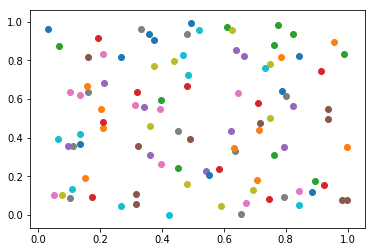

In [69]:
import matplotlib.pyplot as plt
import numpy as np

for i in range (0,100):
  x=np.random.rand()
  y=np.random.rand()
  plt.scatter(x,y)

from sklearn.datasets import load_boston
boston = load_boston()

  


## Exercise 3 - Writing a function
Write a function that, given a list of numbers, calculates the mean, median, and mode of those numbers. Return a dictionary with properties for the mean, median and mode. 

For example:

```
mmm_dict = meanMedianMode([1, 2, 6, 7, 8, 9, 3, 4, 5, 10, 10])
print(mmm_dict)
> {'mean': 5.909090909090909, 'median': 6, 'mode': 10}
```

There are Python standard libraries that make calculating these numbers very easy, but first try your hand at implementing it using the `reduce()` function:

In [0]:
from functools import reduce
help(reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, sequence[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence,
    from left to right, so as to reduce the sequence to a single value.
    For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the sequence in the calculation, and serves as a default when the
    sequence is empty.



In [104]:
from functools import reduce

def mean_func(numbers):
  total = reduce(lambda x, y: x + y, numbers)
  mean = total / len(numbers)
  return mean
  
def median_func(numbers):
  numbers.sort()
  mid = len(numbers) // 2
  if len(numbers) % 2 is 0:
    return findMean([numbers[mid], numbers[mid-1]])
  return numbers[mid]
  
def mode_func(numbers):
  mode = None
  mapping = {x: 0 for x in numbers }
  greatestFrequency = 0
  for n in numbers:
    mapping[n]= mapping[n]+1
    if mapping[n] > greatestFrequency:
      greatestFrequency = mapping[n]
      mode = n
  return mode
  
def meanMedianMode(numbers):
  mmm_dict = {
    'mean': mean_func(numbers),
    'median': median_func(numbers),
    'mode': mode_func(numbers)
  }
  print (mmm_dict)

meanMedianMode([1, 2, 6, 7, 8, 9, 3, 4, 5, 10, 10,10,10])


{'mean': 6.538461538461538, 'median': 7, 'mode': 10}
